#**Introduction**

In this task, I analyzed a large-scale real-world road accident dataset to identify accident hotspots and key contributing factors. The goal was to understand where accidents occur most frequently and what conditions influence them, using effective data visualization techniques.

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
zip_path = "/content/drive/MyDrive/US_Accidents_March23.csv.zip"


In [11]:
import zipfile, os

extract_path = "/content/data"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully")


Dataset unzipped successfully


In [12]:
import pandas as pd

csv_file = [f for f in os.listdir(extract_path) if f.endswith(".csv")][0]
csv_path = os.path.join(extract_path, csv_file)

cols = [
    'Start_Time', 'Weather_Condition', 'Severity',
    'Start_Lat', 'Start_Lng', 'Visibility(mi)'
]

df = pd.read_csv(csv_path, usecols=cols, low_memory=False)


In [13]:
df.head()


,Severity,Start_Time,Start_Lat,Start_Lng,Visibility(mi),Weather_Condition
0,3,2016-02-08 05:46:00,39.865147,-84.058723,10.0,Light Rain
1,2,2016-02-08 06:07:59,39.928059,-82.831184,10.0,Light Rain
2,2,2016-02-08 06:49:27,39.063148,-84.032608,10.0,Overcast
3,3,2016-02-08 07:23:34,39.747753,-84.205582,9.0,Mostly Cloudy
4,2,2016-02-08 07:39:07,39.627781,-84.188354,6.0,Mostly Cloudy


<Axes: xlabel='Hour'>

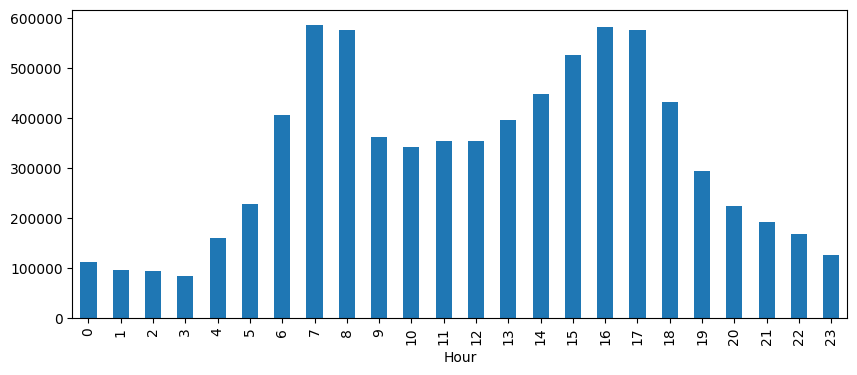

In [15]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['Hour'] = df['Start_Time'].dt.hour

df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))

<Axes: ylabel='Weather_Condition'>

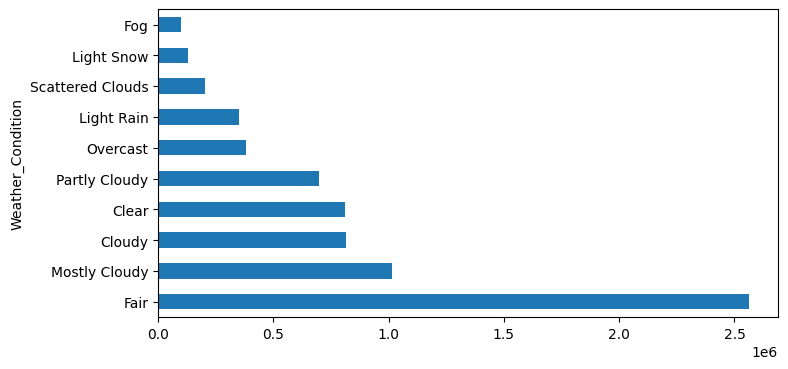

In [16]:
df['Weather_Condition'].value_counts().head(10).plot(
    kind='barh', figsize=(8,4)
)


<Axes: xlabel='Severity'>

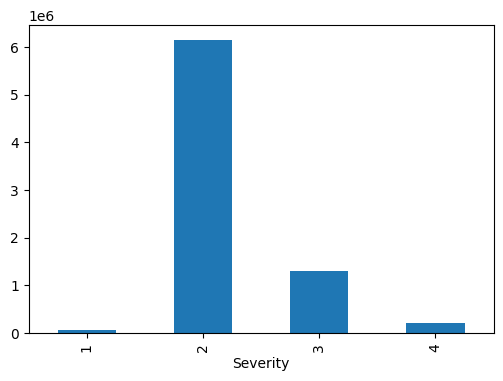

In [17]:
df['Severity'].value_counts().sort_index().plot(
    kind='bar', figsize=(6,4)
)


<Axes: ylabel='Frequency'>

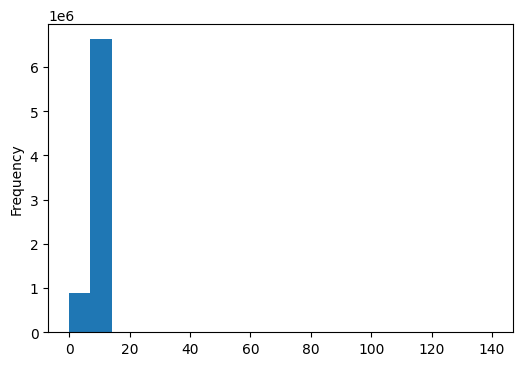

In [18]:
df['Visibility(mi)'].dropna().plot(
    kind='hist', bins=20, figsize=(6,4)
)


<Axes: xlabel='Hour'>

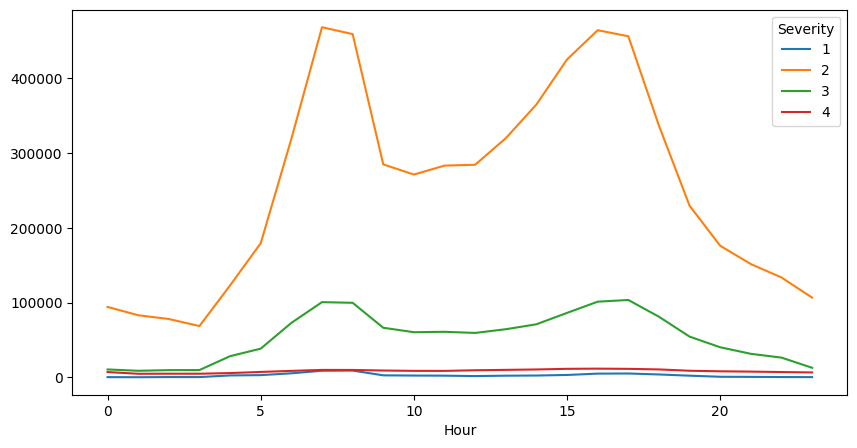

In [20]:
pd.crosstab(df['Hour'], df['Severity']).plot(
    kind='line', figsize=(10,5)
)


#**Summary**
In this task, I worked with a large real-world road accident dataset to analyze and visualize **accident hotspots** and the factors contributing to accidents. I used Google Colab along with Google Drive to efficiently handle the large dataset and performed data loading and preprocessing using **Pandas** and **NumPy**.

 To identify accident-prone areas, I created an interactive hotspot map using **Folium** based on geographic coordinates. Additionally, I analyzed **key contributing factors** such as weather conditions, road visibility, and accident severity, and visualized these insights using Matplotlib and Seaborn.